In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as pit
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


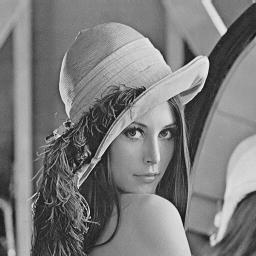

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#pit.imshow (gimg1, cmap= 'gray')
cv2_imshow(gimg1)

In [ ]:
def saturation(value):
  if(value > 255):
    return 255
  elif(value < 0):
    value = 0
    return value


In [ ]:
kernel3 = np.ones((3,3), np.float32)/9
kernel5 = np.ones((5,5), np.float32)/25
kernel7 = np.ones((7,7), np.float32)/49

위 과정을 걸치면 밝기가 일정하게 됨.

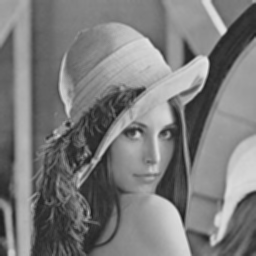

In [ ]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

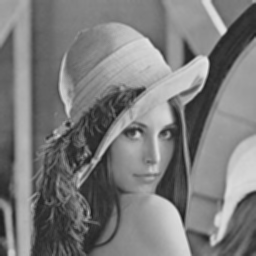

In [ ]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

In [ ]:
gOut = np.zeros((gimg1.shape[0],gimg1.shape[1]), dtype=np.ubyte)

3by3으로

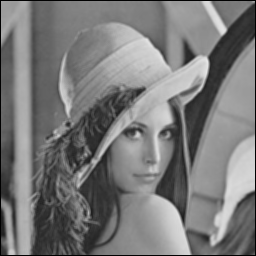

In [ ]:
def saturation(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

for h in range(1, gimg1.shape[0]-1):
    for w in range(1, gimg1.shape[1]-1):
        sum = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                sum += gimg1[h+i, w+j] * kernel3[i+1, j+1]
        sum = saturation(sum)
        gOut[h, w] = sum

cv2_imshow(gOut)


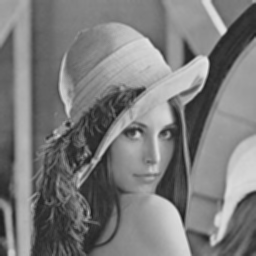

In [ ]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

흐리게 만드는 것은 저주파 필터링>Lowpass, 선명하게 만드는것(눈)은 고주파 필터링>Highpass

평평할 수록 블러가 강해짐. 커널의 크기가 클수록 블러가 강해짐(스무딩 효과가 커짐)

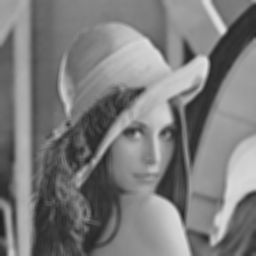

In [ ]:
output = cv2.filter2D(gimg1, -1, kernel5)
cv2_imshow(output)

In [ ]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][1] = -1/9

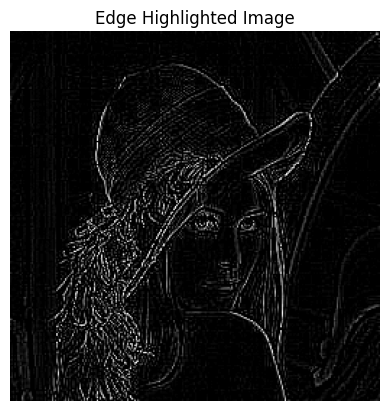

In [ ]:
kernel3 = np.array([
    [-1/9, -1/9, -1/9],
    [-1/9,  8/9, -1/9],
    [-1/9, -1/9, -1/9]
], dtype=np.float32)

# 필터 적용
output = cv2.filter2D(gimg1, -1, kernel3)

# 강조를 위해 값 확대 (테두리만 잘 보이게)
output = np.clip(output * 5, 0, 255).astype(np.uint8)

# 결과 출력
pit.imshow(output, cmap='gray')
pit.title('Edge Highlighted Image')
pit.axis('off')
pit.show()

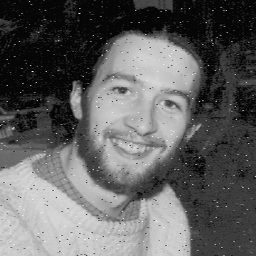

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/facenoise.bmp')
gimg2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg2)

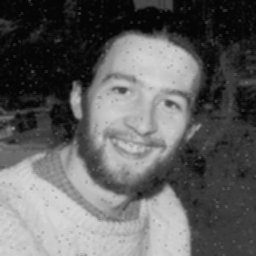

In [ ]:
outimg = cv2.blur(gimg2, (3,3))
cv2_imshow(outimg)

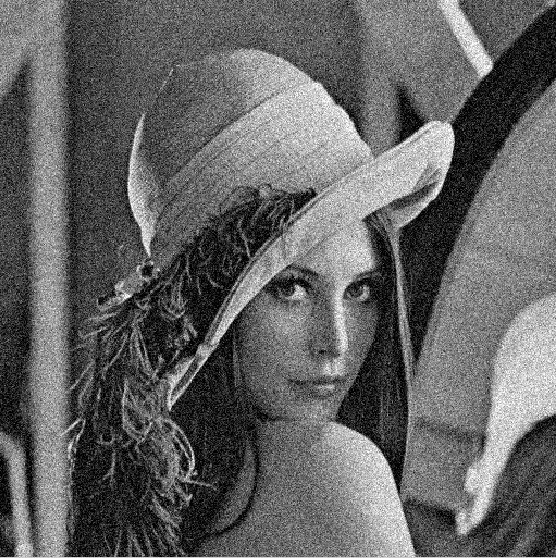

In [35]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lenag2.jpg')
gimg3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gimg3)

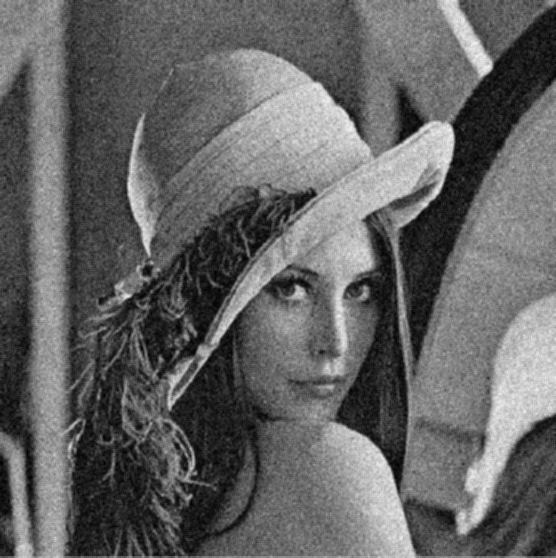

In [36]:
outimg = cv2.blur(gimg3, (3,3))
cv2_imshow(outimg)

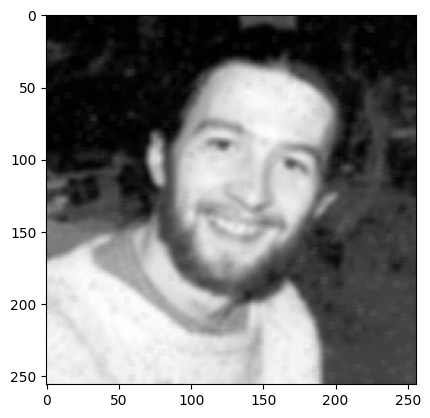

In [44]:
outimg = cv2.blur(gimg2, (5,5))
pit.imshow(outimg, cmap='gray')
#cv2_imshow(outimg)